In [2]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [151]:
president_data = pd.read_json("Resources/PresList.json")
president_data = president_data[["number", "president", "party", "took_office", "left_office"]]
#president_data
president_data.set_index("number")
president_data.head()

,number,president,party,took_office,left_office
0,1,George Washington,No Party,1789-04-30,1797-03-04
1,2,John Adams,Federalist,1797-03-04,1801-03-04
2,3,Thomas Jefferson,Democratic-Republican,1801-03-04,1809-03-04
3,4,James Madison,Democratic-Republican,1809-03-04,1817-03-04
4,5,James Monroe,Democratic-Republican,1817-03-04,1825-03-04


In [55]:
mexico_gdp=pd.read_csv("Resources/MexicoGDP.csv")
mexico_gdp.head()

,DATE,MKTGDPMXA646NWDB
0,1960-01-01,1.304000e+10
1,1961-01-01,1.416000e+10
2,1962-01-01,1.520000e+10
3,1963-01-01,1.696000e+10
4,1964-01-01,2.008000e+10


In [90]:
us_gdp=pd.read_csv("Resources/USGDP.csv")
us_gdp.head()


,DATE,GDP
0,1947-01-01,259.745
1,1948-01-01,280.366
2,1949-01-01,270.627
3,1950-01-01,319.945
4,1951-01-01,356.178


In [117]:
#us_gdp["GDP"] = pd.to_numeric(us_gdp["GDP"])
us_gdp_clean = us_gdp.drop(us_gdp.index[72])
us_gdp_clean['gdp_float'] = us_gdp_clean["GDP"].astype(float)
us_gdp_clean.head()

,DATE,GDP,gdp_float
0,1947-01-01,259.745,259.745
1,1948-01-01,280.366,280.366
2,1949-01-01,270.627,270.627
3,1950-01-01,319.945,319.945
4,1951-01-01,356.178,356.178


In [111]:
us_gdp_clean.dtypes

DATE    object
GDP     object
dtype: object

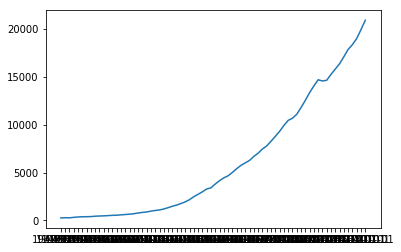

In [113]:
#GDP from 1947 to 2018 in US
plt.plot(us_gdp_clean["DATE"], us_gdp_clean["gdp_float"])

In [88]:
president_data.took_office=pd.to_datetime(president_data['took_office'])
president_data.left_office=pd.to_datetime(president_data['left_office'])
us_gdp.DATE=pd.to_datetime(us_gdp['DATE'])


#diff = president_data.took_office[2] - president_data.took_office[1]
#diff

C:\Users\ksmur\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


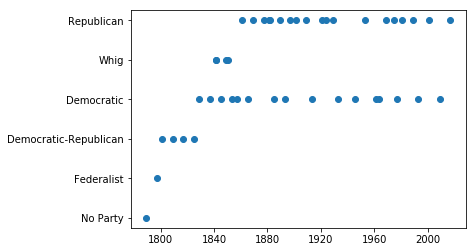

In [40]:
plt.scatter(president_data["took_office"], president_data["party"])


In [4]:
president_data.took_office.head()

0    1789-04-30
1    1797-03-04
2    1801-03-04
3    1809-03-04
4    1817-03-04
Name: took_office, dtype: object

In [76]:
president_data["took_office"].min()

'1789-04-30'

In [120]:
snp500_data=pd.read_csv("Resources/SP500data_csv.csv")
snp500_data.head()

sp500 = snp500_data[["Date", "SP500"]]
sp500.head()

,Date,SP500
0,1871-01-01,4.44
1,1871-02-01,4.50
2,1871-03-01,4.61
3,1871-04-01,4.74
4,1871-05-01,4.86


In [121]:
binning = []
labels = []

for index, row in president_data.iterrows():
    binning.append(row['took_office'])
    labels.append(row['president'])


binning.append("2019-08-27")

In [122]:
sp500.Date=pd.to_datetime(sp500['Date'])
binning=pd.to_datetime(binning)
bins = pd.cut(sp500["Date"], binning, labels=labels)


sp500["President"] = bins


C:\Users\ksmur\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\ksmur\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [123]:
sp500.head()

,Date,SP500,President
0,1871-01-01,4.44,Ulysses S. Grant
1,1871-02-01,4.50,Ulysses S. Grant
2,1871-03-01,4.61,Ulysses S. Grant
3,1871-04-01,4.74,Ulysses S. Grant
4,1871-05-01,4.86,Ulysses S. Grant


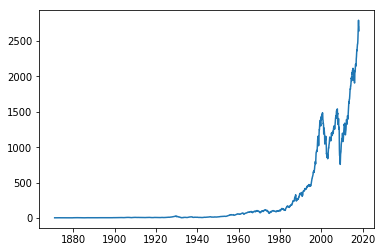

In [124]:
plt.plot(sp500["Date"], sp500["SP500"])

In [159]:
#president_data2=president_data.drop(president_data.head(16).index, inplace=True)
president_data2=president_data.tail(-1)
president_data2

,number,president,party,took_office,left_office
33,34,Dwight D. Eisenhower,Republican,1953-01-20,1961-01-20
34,35,John F. Kennedy,Democratic,1961-01-20,1963-11-22
35,36,Lyndon B. Johnson,Democratic,1963-11-22,1969-01-20
36,37,Richard Nixon,Republican,1969-01-20,1974-08-09
37,38,Gerald Ford,Republican,1974-08-09,1977-01-20
38,39,Jimmy Carter,Democratic,1977-01-20,1981-01-20
39,40,Ronald Reagan,Republican,1981-01-20,1989-01-20
40,41,George H. W. Bush,Republican,1989-01-20,1993-01-20
41,42,Bill Clinton,Democratic,1993-01-20,2001-01-20
42,43,George W. Bush,Republican,2001-01-20,2009-01-20


In [185]:
sp500_groups=sp500.groupby("President")
sp500_new=sp500_groups.first()
sp500_new
sp500_new.dropna(how='any')
#sp500_groups.reset_index()

,Date,SP500
President,,
Ulysses S. Grant,1871-01-01,4.44
Rutherford B. Hayes,1877-04-01,2.94
James A. Garfield,1881-04-01,6.22
Chester A. Arthur,1881-10-01,6.15
Grover Cleveland,1885-04-01,4.37
Benjamin Harrison,1889-04-01,5.18
Grover Cleveland(Term 2),1893-04-01,5.31
William McKinley,1897-04-01,4.06
Theodore Roosevelt,1901-10-01,7.91


In [ ]:
plt.plot(sp500_groups., us_gdp_clean["gdp_float"])